# Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil

import time
import sympy as sp

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import scipy as sc

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
output_directory = str(ceil(time.time())) + '_' + 'hard_coupling'

### Parameters

In [4]:
# Real domain dimensions
A = 3 # Height
B = 2 # Domain

# Set the number of steps (excluding the initial condition)
num_steps = 9

# Simulation time length
T = 9/48

# Time switch conditions (for the boundary condition)
dt_D = 3/48

In [5]:
# Van Genuchten model parameters ( relative permeability model )
theta_s = 0.396
theta_r = 0.131

alpha = 0.423

n = 2.06
K_s = 4.96e-2

m = 1 - 1/n

phi = (theta_s - theta_r)

def initial_h_func(x): return 1

In [6]:
# Set the maximum number of iterations of the non-linear solver
max_iterations_per_step = 1000

# L-scheme parameter
L   = 3.501e-2

# Relative and absolute tolerances for the non-linear solver
abs_tol = 1e-10
rel_tol = 1e-5

numeric_tol = 1e-10

In [7]:
dt = (T-0) / num_steps
N = 10 # 16
quad_order = 1

# Domain tolerance
domain_tolerance = 1 / (10 * N)

In [8]:
verbose = False

### $\theta$ and $K$

In [9]:
# Symbolic psi
psi_var = sp.Symbol('psi', negative=True)

# Symbolic Theta
theta_expression = theta_r + (theta_s - theta_r) / (1 + (-alpha * psi_var) ** n) ** m
effective_saturation = (theta_expression - theta_r) / (theta_s - theta_r)

# Symbolic Conductivity K
hydraulic_conductivity_expression = K_s * (effective_saturation ** 0.5) * ( 1 - (1 - effective_saturation ** (1 / m)) ** m ) ** 2

In [10]:
# Theta lambda
theta_lambda = sp.lambdify(psi_var, theta_expression, 'numpy')

# Conductivity tensor lambda
conductivity_lambda = sp.lambdify(psi_var, hydraulic_conductivity_expression, 'numpy')

In [11]:
# Actual (and final) theta function
def theta(psi):
    mask = np.where(psi < 0)
    res = np.ones_like(psi) * theta_s
    res[mask] = theta_lambda(psi[mask])

    return res

In [12]:
def conductivity(psi):
    if psi >= 0:
        return K_s
    return conductivity_lambda(psi)

### Grid and $V_h$

In [13]:
# convert the grid into a mixed-dimensional grid
darcy_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(1)], [B, 1])
darcy_grid.compute_geometry()
pg.convert_from_pp(darcy_grid)

In [14]:
# convert the grid into a mixed-dimensional grid
richards_grid = pp.StructuredTriangleGrid([N * ceil(B), N * round(A-1)], [B, 1])
richards_grid.compute_geometry()
pg.convert_from_pp(richards_grid)

In [15]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(darcy_grid, darcy_grid.face_centers[1, :] == 1, faces=True)

In [16]:
key = "flow"

darcy_data = {}

In [17]:
darcy_field    = pg.Lagrange1(key)
richards_field = pg.Lagrange1(key)

gamma_field    = pg.Lagrange1(key)

In [18]:
fixed_rhs = np.zeros( darcy_grid.num_nodes + richards_grid.num_nodes - boundary_grid.num_nodes )

In [19]:
darcy_dof    =    darcy_field.ndof( darcy_grid )
richards_dof = richards_field.ndof( richards_grid )

boundary_dof = gamma_field.ndof( boundary_grid )

In [20]:
darcy_data = {}
richards_data = {}

### BC

##### Restrictor matrices

In [21]:
darcy_remove_boundary = np.zeros(shape=(darcy_dof - boundary_dof, darcy_dof))
darcy_remove_boundary[ np.arange(darcy_dof - boundary_dof), darcy_grid.nodes[1, :] < 1 ] = 1
darcy_remove_boundary = sps.csr_matrix(darcy_remove_boundary)

In [22]:
richards_remove_boundary = np.zeros(shape=(richards_dof - boundary_dof, richards_dof))
richards_remove_boundary[ np.arange(richards_dof - boundary_dof), richards_grid.nodes[1, :] > 0 ] = 1
richards_remove_boundary = sps.csr_matrix(richards_remove_boundary)

##### Dirichlet (essential)

In [23]:
darcy_dirichlet_flag  = np.array(darcy_remove_boundary @ (darcy_grid.nodes[0, :] == B), dtype=bool)
darcy_dirichlet_value = np.array(darcy_dirichlet_flag, dtype=float)

In [24]:
richards_dirichlet_flag  = np.array(richards_remove_boundary @ np.logical_and(richards_grid.nodes[1, :] == 1, richards_grid.nodes[0, :] < 1 ), dtype=bool)
richards_dirichlet_value = lambda t: np.array(richards_dirichlet_flag, dtype=float) * min(6.2, 1 + 5.2 * t / dt_D)

In [25]:
dirichlet_flag  = lambda t: np.hstack((darcy_dirichlet_flag, np.zeros(shape=boundary_dof, dtype=bool), richards_dirichlet_flag))
dirichlet_value = lambda t: np.hstack((darcy_dirichlet_value, np.zeros(shape=boundary_dof), richards_dirichlet_value(t)))

##### Neumann (natural)

In [26]:
# Full no-flow condition for the Neumann part.... nothing to add

### Mappings

In [27]:
darcy_bezier_x = np.array([1, 0], dtype=float)
darcy_bezier_y = lambda eta: np.array([-eta*eta/A, eta*eta/A, eta, 0], dtype=float)

In [28]:
darcy_chi    = lambda eta, x: eta * x * (1 + (1-x) * eta * x / A)
richards_chi = lambda eta, x: eta + (A-eta)/A*(x-1) * ( eta + (x-1) * ( 2*(A-eta) - (x-1)*(A-eta) ) )

def darcy_real_height(eta_dofs, heights): 
    res = np.zeros_like(heights)

    for base in range(len(heights)):
        bz_y = darcy_bezier_y(eta_dofs[base])

        for pos in np.arange(base, len(heights), boundary_grid.num_nodes):
            res[pos] = np.polyval(bz_y, heights[pos])
        
        bz_x = None
        bz_y = None

    return res

In [29]:
def darcy_real_height(eta_dofs, heights):
    return darcy_chi(eta_dofs, heights)

In [30]:
richards_bezier_x = np.array([1, 0], dtype=float)
#richards_bezier_y = lambda eta: np.array([(3*A*A-5*A*eta+2*eta*eta)/(3*A), (2*A*eta-2*eta*eta)/(3*A), eta], dtype=float)
richards_bezier_y = lambda eta: np.array([(2*A*eta - A*A - eta*eta)/A, 2*(A-eta)*(A-eta)/A, (A-eta)*eta/A, eta], dtype=float)

def richards_real_height(eta_dofs, heights): 
    res = np.zeros_like(heights)

    for base in range(boundary_grid.num_nodes):
        bz_y = richards_bezier_y(eta_dofs[base])

        for pos in np.arange(base, richards_grid.num_nodes, boundary_grid.num_nodes):
            #loc = richards_bezier_x.copy()
            #loc[-1] -= (1 + heights[pos])

            #roots = np.roots(loc)
            #t_val = np.real(roots[np.logical_and(np.logical_and(-numeric_tol <= np.real(roots), np.real(roots) <= 1+numeric_tol), np.abs(np.imag(roots)) < numeric_tol)])

            res[pos] = np.polyval(bz_y, heights[pos])#t_val)
        
        bz_y = None

    return res

In [31]:
def richards_real_height(eta_dofs, heights):
    return richards_chi(eta_dofs, heights)

### Matrix Assembly

##### Masks

In [32]:
darcy_mask = np.zeros(shape=(darcy_dof + richards_dof - boundary_dof), dtype=bool)
darcy_mask[ : (darcy_dof) ] = True

In [33]:
darcy_internal_mask = np.zeros_like(darcy_mask, dtype=bool)
darcy_internal_mask[ : (darcy_dof - boundary_dof) ] = True

In [34]:
richards_mask = np.zeros_like(darcy_mask, dtype=bool)
richards_mask[(darcy_dof-boundary_dof):] = True

In [35]:
richards_internal_mask = np.zeros_like(darcy_mask, dtype=bool)
richards_internal_mask[ darcy_dof : ] = True

In [36]:
boundary_mask = np.zeros_like(darcy_mask, dtype=bool)
boundary_mask[(darcy_dof - boundary_dof):(darcy_dof)] = True

##### Finite difference matrices

In [37]:
eta_diff = gamma_field.assemble_diff_matrix( boundary_grid )
eta_diff[0,0] = -1
eta_diff *= (N)

#### Stifness

In [38]:
%%cython
import numpy as np

def find_ordering(coord: np.array):
    lx = np.argmin(coord[0, :])
    rx = np.argmax(coord[0, :])
    mx = np.setdiff1d(np.array([0,1,2]), np.array([lx, rx]))[0]

    # Vertical Alignment
    if np.abs( coord[0, lx] - coord[0, mx] ) < 1e-7:
        # lx and mx vertical aligned, rx no
        up =   lx if np.argmax(coord[1, np.array([lx, mx])]) == 0 else mx
        down = lx if np.argmin(coord[1, np.array([lx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, rx] ) < 1e-7:
            return [up, down, rx]
        else:
            return [down, rx, up]
    else:
        # rx and mx vertical aligned, lx no
        up =   rx if np.argmax(coord[1, np.array([rx, mx])]) == 0 else mx
        down = rx if np.argmin(coord[1, np.array([rx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, lx] ) < 1e-7:
            return [up, lx, down]
        else:
            return [down, up, lx]

def find_y(bz_x, bz_y, x):
    #loc = bz_x.copy()
    #loc[-1] -= x
    #roots = np.roots(loc)
    #t_val = roots[np.logical_and(np.logical_and(-numeric_tol <= np.real(roots), np.real(roots) <= 1+numeric_tol), np.abs(np.imag(roots)) < numeric_tol)]

    return np.polyval(bz_y, x)#t_val)

def find_y_vect(bz_x, bz_y, vect):
    res = np.zeros_like(vect)
    for i in range(len(vect)):
        res[i] = find_y(bz_x.copy(), bz_y.copy(), vect[i])
    return res

def derivatives_chi_x3_eta(bz_x, bz_y, eta, x3, increment_x = 1/N**3, increment_eta = 1 / N**3):
    chi_x3 = 0

    base_bz_y = bz_y(eta)

    base = find_y( bz_x.copy(), bz_x.copy(), x3 )

    if np.abs(x3 - eta) > increment_x:
        plus  = find_y( bz_x.copy(), base_bz_y.copy(), x3 + increment_x )

        minus = find_y( bz_x.copy(), base_bz_y.copy(), x3 - increment_x )

        chi_x3 = (plus - minus) / (2 * np.abs(increment_x))
    else:
        chi_x3 = (base - find_y( bz_x.copy(), bz_x.copy(), x3 - increment_x )) / (2 * np.abs(increment_x))

    
    return chi_x3, ( find_y(bz_x.copy(), bz_y(eta + increment_eta), x3) - find_y(bz_x.copy(), bz_y(eta - increment_eta), x3) ) / (2 * increment_eta)

In [39]:
def Darcy_K_func(base_height: float, base_width: float, element_height: float, element_width: float, m: int, ls_eta: float, rs_eta: float, grad_eta: float, x, y):
    coord = lambda t: ((m+1) * (1-t) - (m-1) * t) / 2

    x3 = base_height + coord(x) * element_height
    eta = (1-coord(y)) * ls_eta + coord(y) * rs_eta

    #chi_x3, chi_eta = derivatives_chi_x3_eta( darcy_bezier_x, darcy_bezier_y, eta, x3 )
    chi_x3  = eta * ( 1 + eta * x3 / A * ( 2 - 3 * eta * x3 ) )
    chi_eta = x3 * (1 + 2 * eta / A * x3 * (1 - 2*x3) )

    #return np.eye(2) * K_s

    return np.array([[             chi_x3,                            -chi_eta * grad_eta],
                     [-chi_eta * grad_eta, (1 + np.power(chi_eta * grad_eta, 2)) / chi_x3]]) * K_s / chi_x3 #[:, :, 0]

    # This is the full version:
    #return np.array([[                  chi_x3 * k11,                                                    k12 - chi_eta * grad_eta * k11],
    #                 [k21 - chi_eta * grad_eta * k11, ( k22 + chi_eta * grad_eta * ( chi_eta * grad_eta * k11 - k12 - k21 ) ) / chi_x3 ]])

In [40]:
def Richards_K_func(base_height: float, base_width: float, element_height: float, element_width: float, m: int, ls_eta: float, rs_eta: float, grad_eta: float, A: float, psi, x, y):
    coord = lambda t: ((m+1) * (1-t) - (m-1) * t) / 2

    x3 = base_height + coord(x) * element_height
    eta = (1-coord(y)) * ls_eta + coord(y) * rs_eta

    #chi_x3, chi_eta = derivatives_chi_x3_eta( richards_bezier_x, richards_bezier_y, eta, x3 )
    chi_x3  = (A - eta) / A * ( eta + (A-eta)*(x3-1)*(4-3*(x3-1)) )
    chi_eta = 1 + (x3-1)/A * ( A - 2*eta + 2*(A-eta)*(x3-1)*(x3-3) )

    #return np.array([[2, 0], [0, 1/2]]) * conductivity(psi(x,y))

    return np.array([[             chi_x3,                            -chi_eta * grad_eta],
                     [-chi_eta * grad_eta, (1 + np.power(chi_eta * grad_eta, 2)) / chi_x3]]) * conductivity(psi) / chi_x3

    # This is the full version:
    #return np.array([[                  chi_x3 * k11,                                                    k12 - chi_eta * grad_eta * k11],
    #                 [k21 - chi_eta * grad_eta * k11, ( k22 + chi_eta * grad_eta * ( chi_eta * grad_eta * k11 - k12 - k21 ) ) / chi_x3 ]])

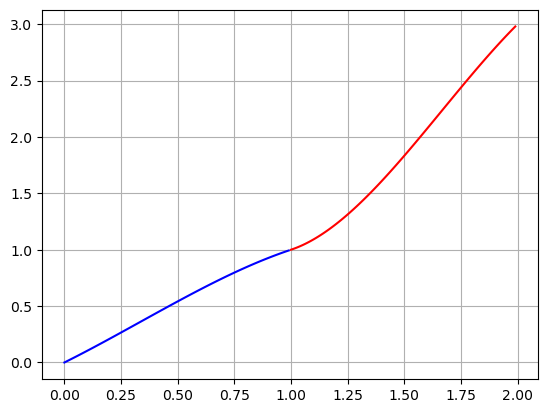

In [41]:
ax = plt.subplot(1,1,1)

ax.plot( np.arange(0, 1, 0.01),    darcy_chi(1, np.arange(0, 1, 0.01)), 'b' )
ax.plot( np.arange(1, 2, 0.01), richards_chi(1, np.arange(1, 2, 0.01)), 'r' )
ax.grid()

In [42]:
def richards_local_A(coord, ls_eta, rs_eta, grad_eta, m, psi):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]
    
    J_T_1_T = np.array([[x2[1]-x0[1], x0[1]-x1[1]],
                        [x0[0]-x2[0], x1[0]-x0[0]]]) / ((x1[0]-x0[0]) * (x2[1]-x0[1]) - (x2[0]-x0[0]) * (x1[1]-x0[1]))
    

    q_funcs = [J_T_1_T @ np.array([-1, -1]), J_T_1_T @ np.array([ 1, 0]), J_T_1_T @ np.array([0,  1])]

    M = np.zeros(shape=(3,3))

    jacobian = 1 / np.linalg.det( J_T_1_T.T )
    ordered_psi = psi[ordering]

    psi_fun = lambda x,y: ordered_psi[0] + (ordered_psi[1] - ordered_psi[0]) * x + (ordered_psi[2] - ordered_psi[0]) * y
        
    base_height = np.min(coord[1, :]) + 1
    base_width  = np.min(coord[0, :])
    
    element_height = np.max(coord[1, :]) - np.min(coord[1, :])
    element_width  = np.max(coord[0, :]) - np.min(coord[0, :])

    K_local = lambda x,y: Richards_K_func(base_height, base_width,
        element_height, element_width,
        m,
        ls_eta, rs_eta, grad_eta, A, psi_fun(x, y), x, y)

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([q_funcs[j].T @ K_local(x, y) @ q_funcs[i] for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            M[ ordering[i], ordering[j] ] = jacobian * integrate.fixed_quad(inside, 0, 1, n=quad_order, args=(quad_order,))[0]

    return M

In [43]:
def darcy_local_A(coord, ls_eta, rs_eta, grad_eta, m):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]
    
    J_T_1_T = np.array([[x2[1]-x0[1], x0[1]-x1[1]],
                        [x0[0]-x2[0], x1[0]-x0[0]]]) / ((x1[0]-x0[0]) * (x2[1]-x0[1]) - (x2[0]-x0[0]) * (x1[1]-x0[1]))
    

    q_funcs = [J_T_1_T @ np.array([-1, -1]), J_T_1_T @ np.array([ 1, 0]), J_T_1_T @ np.array([0,  1])]

    M = np.zeros(shape=(3,3))

    jacobian = 1 / np.linalg.det( J_T_1_T.T )
        
    base_height = np.min(coord[1, :])
    base_width  = np.min(coord[0, :])
    
    element_height = np.max(coord[1, :]) - np.min(coord[1, :])
    element_width  = np.max(coord[0, :]) - np.min(coord[0, :])
    
    K_local = lambda x,y: Darcy_K_func(base_height, base_width,
        element_height, element_width,
        m,
        ls_eta, rs_eta, grad_eta, x, y)

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([q_funcs[j].T @ K_local(x, y) @ q_funcs[i] for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            M[ ordering[i], ordering[j] ] = jacobian * integrate.fixed_quad(inside, 0, 1, n=quad_order, args=(quad_order,))[0]

    return M

In [44]:
def global_stifness(eta_dofs, psi_dofs):

    grad_eta = eta_diff @ eta_dofs
    
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells + np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    for subdomain, base in zip([darcy_grid, richards_grid], [0, boundary_grid.num_nodes * N]):
        _, _, _, _, _, node_coords = pp.map_geometry.map_grid(subdomain)
        _, _, sign = sps.find(subdomain.cell_faces)

        # Allocate the data to store matrix entries, that's the most efficient
        # way to create a sparse matrix.

        cell_nodes = subdomain.cell_nodes()

        for c in np.arange(subdomain.num_cells):
            # For the current cell retrieve its nodes
            loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

            nodes_loc = cell_nodes.indices[loc]
            coord_loc = node_coords[:, nodes_loc]

            eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < subdomain.cell_centers[0, c] ))

            # Compute the stiff-H1 local matrix

            if subdomain == darcy_grid:
                A = darcy_local_A(coord_loc, eta_dofs[eta_cell], eta_dofs[eta_cell+1], grad_eta[eta_cell], np.prod(sign[loc]))
            else:
                A = richards_local_A(coord_loc, eta_dofs[eta_cell], eta_dofs[eta_cell+1], grad_eta[eta_cell], np.prod(sign[loc]), psi_dofs[nodes_loc])

            # Save values for stiff-H1 local matrix in the global structure
            cols = base + np.tile(nodes_loc, (nodes_loc.size, 1))

            loc_idx = slice(idx, idx + cols.size)
            rows_I[loc_idx] = cols.T.ravel()
            cols_J[loc_idx] = cols.ravel()
            data_IJ[loc_idx] = A.ravel()
            idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Mass matrices

In [45]:
def local_mass(coord, mult):
    ordering = find_ordering(coord)

    x0 = coord[:, ordering][:, 0]
    x1 = coord[:, ordering][:, 1]
    x2 = coord[:, ordering][:, 2]

    qs = [(lambda x,y: 1-x-y), (lambda x,y: x), (lambda x,y: y)]
    
    J = np.array([[x1[0]-x0[0], x2[0]-x0[0]],
                  [x1[1]-x0[1], x2[1]-x0[1]]])
    
    jacobian = np.linalg.det(J)
    M = np.zeros(shape=(3,3))

    for i in range(3):
        for j in range(3):
            integrand = lambda ys,x: np.array([qs[j](x,y) * qs[i](x,y) for y in np.array(ys)])
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            tmp = integrate.fixed_quad(inside, 0, 1, n=2, args=(2,))[0]

            M[ ordering[i], ordering[j] ] = tmp * jacobian

    return M * mult

In [46]:
local_mass(np.array([[0, 1, 0], [0, 0, 1]]), 1)

array([[0.08333333, 0.04166667, 0.04166667],
       [0.04166667, 0.08333333, 0.04166667],
       [0.04166667, 0.04166667, 0.08333333]])

In [47]:
darcy_mult    = lambda ls, rs: 1
richards_mult = lambda ls, rs: 1

In [48]:
def global_mass(eta_dofs):
    
    size = np.power(darcy_grid.dim + 1, 2) * darcy_grid.num_cells + np.power(richards_grid.dim + 1, 2) * richards_grid.num_cells
    rows_I = np.empty(size, dtype=int)
    cols_J = np.empty(size, dtype=int)
    data_IJ = np.empty(size)
    idx = 0

    for subdomain, base, mult, bz_x, bz_y, base_height in zip([darcy_grid, richards_grid], [0, boundary_grid.num_nodes * N], [darcy_mult, richards_mult],
                                                              [darcy_bezier_x, richards_bezier_x], [darcy_bezier_y, richards_bezier_y], [0,0]):
        _, _, _, _, _, node_coords = pp.map_geometry.map_grid(subdomain)

        # Allocate the data to store matrix entries, that's the most efficient
        # way to create a sparse matrix.

        cell_nodes = subdomain.cell_nodes()
        
        for c in np.arange(subdomain.num_cells):
            # For the current cell retrieve its nodes
            loc = slice(cell_nodes.indptr[c], cell_nodes.indptr[c + 1])

            nodes_loc = cell_nodes.indices[loc]
            coord_loc = node_coords[:, nodes_loc]

            # Compute the stiff-H1 local matrix
            
            eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < subdomain.cell_centers[0, c] ))

            #chi_x3, _ = derivatives_chi_x3_eta(bz_x, bz_y, (eta_dofs[eta_cell] + eta_dofs[eta_cell+1])/2, base_height + subdomain.cell_centers[1, c] )
            A = local_mass(coord_loc, 1)#chi_x3)

            # Save values for stiff-H1 local matrix in the global structure
            cols = base + np.tile(nodes_loc, (nodes_loc.size, 1))

            loc_idx = slice(idx, idx + cols.size)
            rows_I[loc_idx] = cols.T.ravel()
            cols_J[loc_idx] = cols.ravel()
            data_IJ[loc_idx] = A.ravel()
            idx += cols.size

    # Construct the global matrices
    return sps.csc_matrix((data_IJ, (rows_I, cols_J)))

#### Projection matrices

In [49]:
darcy_proj    =    darcy_field.eval_at_cell_centers( darcy_grid )
richards_proj = richards_field.eval_at_cell_centers( richards_grid )

#### Restrictor matrices

In [50]:
darcy_restrict_to_boundary = np.zeros(shape=(boundary_dof, darcy_dof))
darcy_restrict_to_boundary[np.arange(boundary_dof), darcy_grid.nodes[1, :] == 1] = 1

In [51]:
richards_restrict_to_boundary = np.zeros(shape=(boundary_dof, richards_dof))
richards_restrict_to_boundary[np.arange(boundary_dof), richards_grid.nodes[1, :] == 0] = 1

### Solve System

In [52]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [53]:
# Fixed rhs
fixed_rhs = np.zeros(darcy_dof + richards_dof - boundary_dof)

In [54]:
# Initial conditions
sol = [np.zeros_like(fixed_rhs)]
sol[-1][darcy_mask] = darcy_field.interpolate( darcy_grid, initial_h_func )
sol[-1][richards_mask] = richards_field.interpolate( richards_grid, initial_h_func )

In [55]:
def save_step(sol, savers, i):

    for saver, proj, mask, grid, heights in zip(savers, [darcy_proj, richards_proj], [darcy_mask, richards_mask], [darcy_grid, richards_grid], [darcy_real_height(np.tile(sol[boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes)), darcy_grid.nodes[1,:]), 
                                                                                                                                                richards_real_height(np.tile(sol[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :])]):
        ins = list()

        ins.append((grid, "cell_h", proj @ sol[mask]))
        ins.append((grid, "cell_p", proj @ (sol[mask] - heights)))

        saver.write_vtu(ins, time_step=i)

In [56]:
# Save the initial solution
savers = [pp.Exporter(darcy_grid, 'sol_D', folder_name=output_directory), 
          pp.Exporter(richards_grid, 'sol_R', folder_name=output_directory)]
save_step(sol[-1], savers, 0)

In [57]:
csv_base = os.path.join(output_directory, 'csv')
os.mkdir( csv_base )

In [58]:
# Time Loop
for i in range(1, num_steps+1):
    current_time = i * dt
    print('Time ' + str(round(current_time, 5)))

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy()

    # Prepare the rhs
    time_rhs = fixed_rhs.copy()

    glob_mass = global_mass(prev[boundary_mask])
    richards_M_h = glob_mass[richards_mask, :][:, richards_mask]
    
    time_rhs[richards_mask] += richards_M_h @ theta(prev[richards_mask] - richards_real_height(np.tile(prev[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :]) ) / dt
    
    debug_savers = [pp.Exporter(darcy_grid,    str(i) + '_sol_D', folder_name=os.path.join(output_directory, 'debug')), 
                    pp.Exporter(richards_grid, str(i) + '_sol_R', folder_name=os.path.join(output_directory, 'debug'))]
    save_step(sol[-1], debug_savers, 0)

    # Non-linear loop
    for k in range(max_iterations_per_step):
        rhs = time_rhs.copy()


        rhs[richards_mask] += (L * richards_M_h @ prev[richards_mask] - richards_M_h @ theta(prev[richards_mask] - richards_real_height(np.tile(prev[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :]) ) ) / dt

        global_stif  = global_stifness( prev[boundary_mask], prev[richards_mask] - richards_real_height(np.tile(prev[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :]) )
        darcy_A_h    = global_stif[darcy_mask, :][:, darcy_mask]
        richards_A_h = global_stif[richards_mask, :][:, richards_mask]

        darcy_start    = darcy_A_h
        richards_start = richards_A_h + L / dt * richards_M_h

        mid_start = global_stif[boundary_mask, :][:, boundary_mask] + L / dt * glob_mass[boundary_mask, :][:, boundary_mask]
        

        spp = sps.bmat([[       darcy_remove_boundary @ darcy_start @ darcy_remove_boundary.T,          darcy_remove_boundary @ darcy_start @ darcy_restrict_to_boundary.T,                                                                          None],
                        [darcy_restrict_to_boundary @ darcy_start.T @ darcy_remove_boundary.T,                                                                   mid_start, richards_restrict_to_boundary @ richards_start.T @ richards_remove_boundary.T],
                        [                                                                None, richards_remove_boundary @ richards_start @ richards_restrict_to_boundary.T,        richards_remove_boundary @ richards_start @ richards_remove_boundary.T]], format='csc')


        ls = pg.LinearSystem(spp, rhs)
        ls.flag_ess_bc(dirichlet_flag(current_time), dirichlet_value(current_time))

        current = ls.solve()


        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        abs_err_psi  = np.sqrt( (current - prev).T @ glob_mass @ (current - prev) )
        abs_err_prev = np.sqrt( prev.T @ glob_mass @ prev )

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd')
              + ', error L2 relative psi: ' + format(abs_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4)
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )


        save_step(current, debug_savers, k+1)
        
        if abs_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')

    sol.append( current.copy() )
    save_step(sol[-1], savers, i)

    export_name = os.path.join(csv_base, str(i) + '.csv')

    with open( export_name, 'w' ) as file:

        file.write('x,y,h,p\n')

        et = np.tile(sol[-1][boundary_mask], ceil(darcy_grid.num_nodes / boundary_grid.num_nodes) - 1)
        ff = np.where(darcy_grid.nodes[1, :] < 1)[0]
        hd = darcy_real_height(et, darcy_grid.nodes[1, ff])
        for x,y,h,p in zip( darcy_grid.nodes[0, ff], hd, sol[-1][darcy_internal_mask], sol[-1][darcy_internal_mask] - hd):
            file.write(f'{x},{y},{h},{p}\n')

        et = np.tile(sol[-1][boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes))
        hd = richards_real_height(np.tile(prev[boundary_mask], ceil(richards_grid.num_nodes / boundary_grid.num_nodes)), 1+richards_grid.nodes[1, :])
        for x,y,h,p in zip( richards_grid.nodes[0, :], hd, sol[-1][richards_mask], sol[-1][richards_mask] - hd ):
            file.write(f'{x},{y},{h},{p}\n')


for saver in savers:
    saver.write_pvd([t * dt for t in range(int(T/dt)+1)])

Time 0.02083
Iteration #0001, error L2 relative psi:    0.23317280345729
Iteration #0002, error L2 relative psi:    0.09196730250660


Iteration #0003, error L2 relative psi:    0.01803261194813
Iteration #0004, error L2 relative psi:    0.00225954212594
Iteration #0005, error L2 relative psi:    0.00016424022342
Iteration #0006, error L2 relative psi:    0.00001219618418

Time 0.04167
Iteration #0001, error L2 relative psi:    0.39392415330062
Iteration #0002, error L2 relative psi:    0.17201049453938
Iteration #0003, error L2 relative psi:    0.06126718675704
Iteration #0004, error L2 relative psi:    0.01441738028765
Iteration #0005, error L2 relative psi:    0.00498851820995
Iteration #0006, error L2 relative psi:    0.00149840477676
Iteration #0007, error L2 relative psi:    0.00034433094121
Iteration #0008, error L2 relative psi:    0.00011081435782
Iteration #0009, error L2 relative psi:    0.00002840563326
Iteration #0010, error L2 relative psi:    0.00000997082841

Time 0.0625
Iteration #0001, error L2 relative psi:    0.52118867388236
Iteration #0002, error L2 relative psi:    0.17028459973439


KeyboardInterrupt: 